# Handwritten digits classification using neural network

we used here only single input layer and output layer,  not added hidden layers.
we will check results by adding hidden layers also.

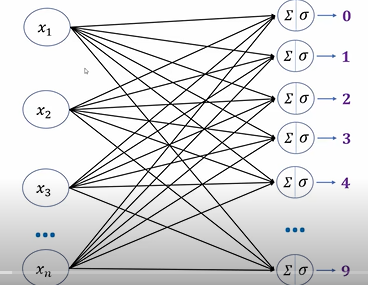

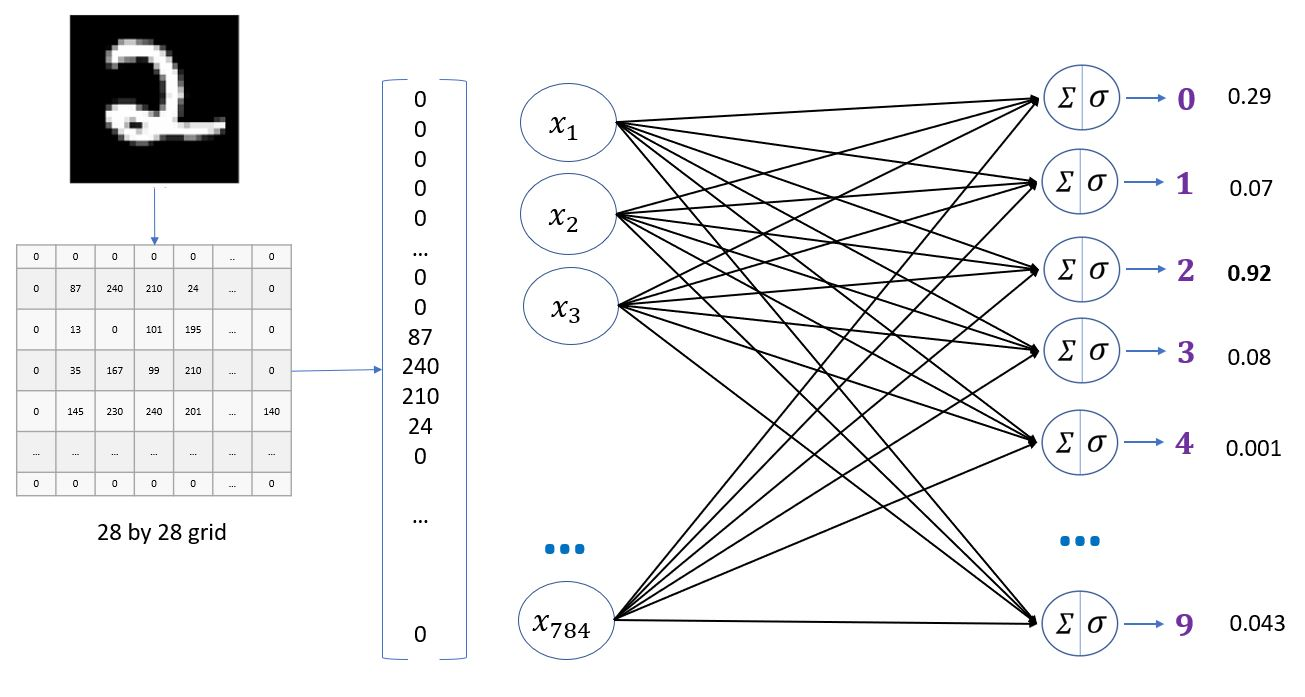

here we are using sigmoid function, whose value is between 0 and 1. More similarity score neuron will be fired.

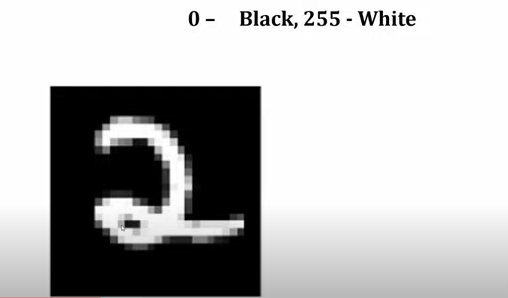

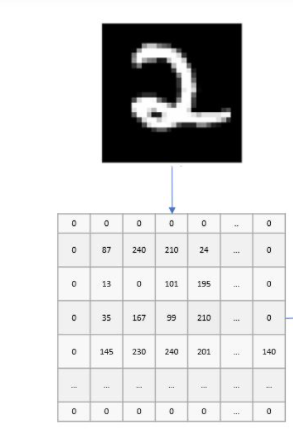

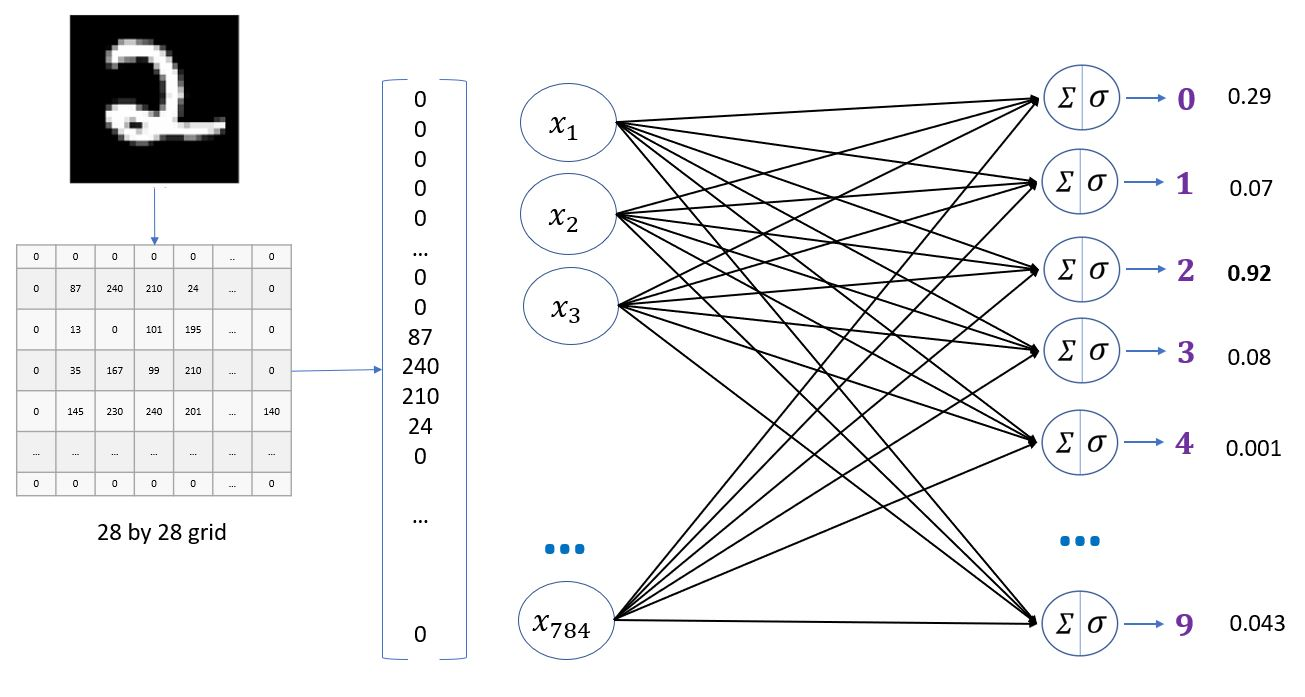

flattening of 2D array into 1 dimnsional array 

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]  # shows 2 dimensional arrays , pixel values between 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

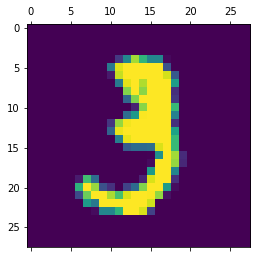

In [12]:
plt.matshow(X_train[10])

In [13]:
y_train[10]

3

In [20]:
#X_train = X_train / 255
#X_test = X_test / 255

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)  # reshape for flattening the array
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
# build simple neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])                           # Sequential groups a linear stack of layers into a neural network. 10 is output neurons, 784 is input neurons

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)     # train the model

Epoch 1/5
1875/1875 [==============================] - 1s 647us/step - loss: 0.4701 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 1s 605us/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 593us/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.2668 - accuracy: 0.9258


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 578us/step - loss: 0.2693 - accuracy: 0.9242


[0.26931852102279663, 0.9241999983787537]

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]               # it will print all 10 scores in the output

array([2.1782279e-02, 5.2966851e-07, 8.0670446e-02, 9.6602070e-01,
       2.9151738e-03, 9.7083628e-02, 1.7450670e-06, 9.9982095e-01,
       8.2823992e-02, 7.4033207e-01], dtype=float32)

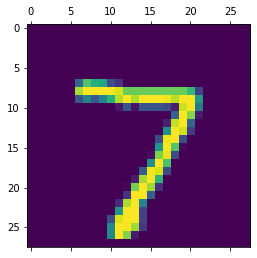

In [37]:
plt.matshow(X_test[0])

In [38]:
np.argmax(y_predicted[0])    # argmax is used in numpy to get maximum score index

7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Using hidden layer

In [2]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),         # approximately using 100 neurons in hidden layer and relu as activation function
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

NameError: name 'keras' is not defined

In [52]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 697us/step - loss: 0.0811 - accuracy: 0.9765


[0.08109056204557419, 0.9764999747276306]

Text(69.0, 0.5, 'Truth')

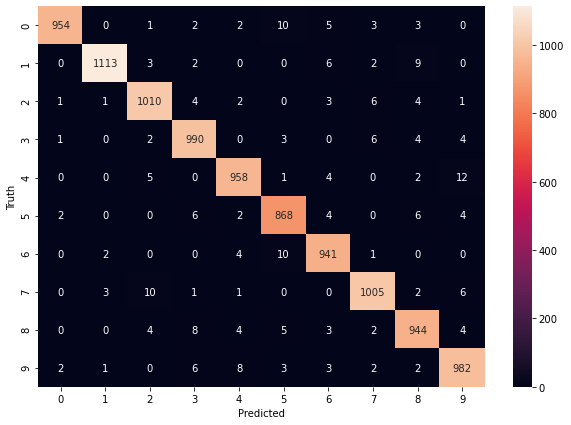

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 936us/step - loss: 0.2741 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.1222 - accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.0844 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.0649 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.0515 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.0414 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0347 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 1s 757us/step - loss: 0.0276 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 855us/step - loss: 0.0236 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 1s 776u

In [55]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 711us/step - loss: 0.0776 - accuracy: 0.9801


[0.07762904465198517, 0.9800999760627747]